<a href="https://colab.research.google.com/github/Ranjani94/Deep_Learning/blob/master/homework1/Fastai_lesson1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Lesson_1: Image Classificationn [FLOWERS]

In [0]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [0]:

from fastai.vision import *
from fastai.metrics import error_rate

In [0]:
# path = Path('/content/gdrive/My Drive/image_classification')
# dest = path/folder
# dest.mkdir(parents=True, exist_ok=True)

In [0]:
bs=64

In [0]:

help(untar_data)

Help on function untar_data in module fastai.datasets:

untar_data(url:str, fname:Union[pathlib.Path, str]=None, dest:Union[pathlib.Path, str]=None, data=True, force_download=False) -> pathlib.Path
    Download `url` to `fname` if `dest` doesn't exist, and un-tgz to folder `dest`.



#Downloading the dataset

In [0]:
path = untar_data(URLs.FLOWERS); path

PosixPath('/root/.fastai/data/oxford-102-flowers')

In [0]:
path.ls()

[PosixPath('/root/.fastai/data/oxford-102-flowers/test.txt'),
 PosixPath('/root/.fastai/data/oxford-102-flowers/jpg'),
 PosixPath('/root/.fastai/data/oxford-102-flowers/train.txt'),
 PosixPath('/root/.fastai/data/oxford-102-flowers/valid.txt')]

In [0]:

path_img = path/'jpg'
# path_test = path/'cars_test'
# path_annos = path/'cars_annos.mat'

In [0]:
fnames = get_image_files(path_img)
fnames[:5]

[PosixPath('/root/.fastai/data/oxford-102-flowers/jpg/image_07971.jpg'),
 PosixPath('/root/.fastai/data/oxford-102-flowers/jpg/image_00920.jpg'),
 PosixPath('/root/.fastai/data/oxford-102-flowers/jpg/image_01138.jpg'),
 PosixPath('/root/.fastai/data/oxford-102-flowers/jpg/image_07714.jpg'),
 PosixPath('/root/.fastai/data/oxford-102-flowers/jpg/image_02016.jpg')]

In [0]:
np.random.seed(2)
pat = r'/([^/]+)_\d+.jpg$'

In [0]:
data = ImageDataBunch.from_name_re(path_img, fnames, pat, ds_tfms=get_transforms(), size=224, bs=bs).normalize(imagenet_stats)

#Visualizing

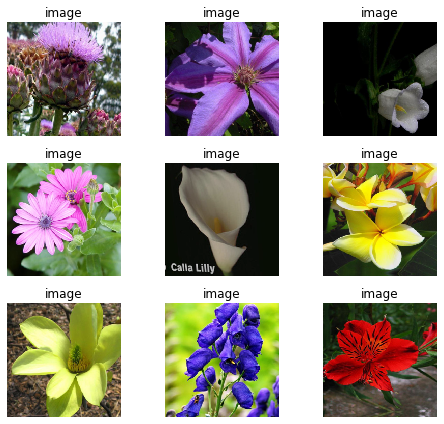

In [0]:

data.show_batch(rows=3, figsize=(7,6))

In [0]:
print(data.classes)
len(data.classes),data.c

['image']


(1, 1)

##Training with resnet34

In [0]:
learn = cnn_learner(data, models.resnet34, metrics=error_rate)

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/checkpoints/resnet34-333f7ec4.pth


In [0]:
learn.model

Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  

#Four epochs to get best result with less loss

In [0]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,time
0,0.000000,0.000000,0.000000,03:13
1,0.000000,0.000000,0.000000,03:06
2,0.000000,0.000000,0.000000,03:07
3,0.000000,0.000000,0.000000,03:00


In [0]:
learn.save('stage-1')


In [0]:

interp = ClassificationInterpretation.from_learner(learn)

losses,idxs = interp.top_losses()

len(data.valid_ds)==len(losses)==len(idxs)

True

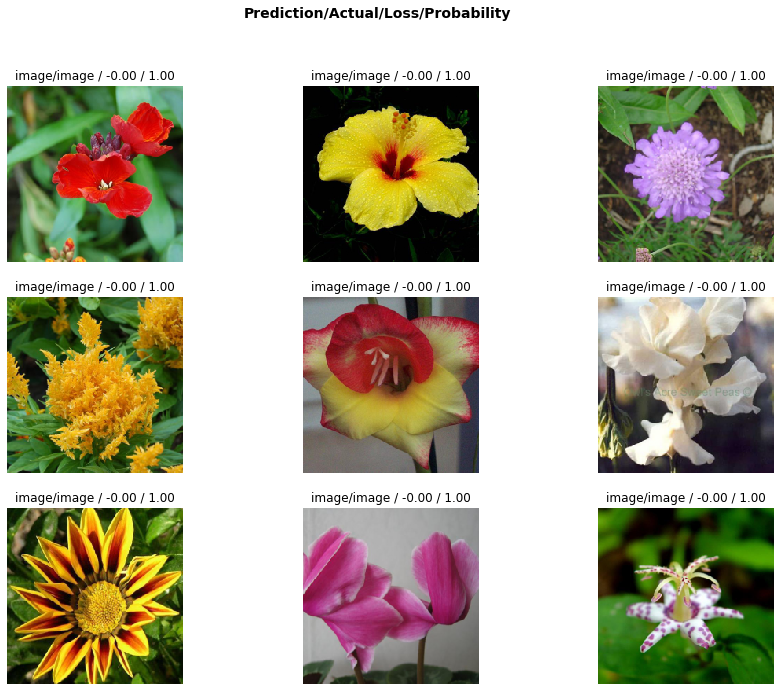

In [0]:
interp.plot_top_losses(9, figsize=(15,11))

In [0]:
doc(interp.plot_top_losses)

#Confusion Matrix

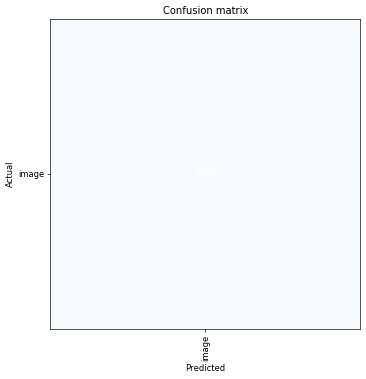

In [0]:
#No lossess
interp.plot_confusion_matrix(figsize=(6,7), dpi=60)

In [0]:

interp.most_confused(min_val=2)

[]

In [0]:
learn.unfreeze()

In [0]:
learn.fit_one_cycle(1)


epoch,train_loss,valid_loss,error_rate,time
0,0.000000,0.000000,0.000000,03:13


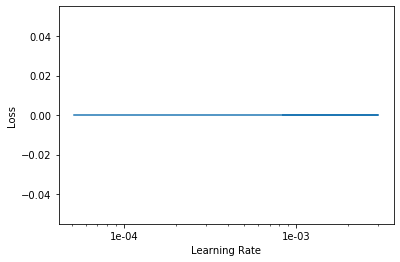

In [0]:
learn.recorder.plot()